## Arbitary value imputation
it consist of replacing NAN by an arbitary value

In [71]:
import pandas as pd
df = pd.read_csv('titanic_data.csv',usecols=['age','fare','survived'])
df.head()

,survived,age,fare
0,1,29.0000,211.3375
1,1,0.9167,151.5500
2,0,2.0000,151.5500
3,0,30.0000,151.5500
4,0,25.0000,151.5500


In [72]:
def impute_nan(df,variable):
    df[variable+'_zeros']=df[variable].fillna(0)
    df[variable+'_hundred']=df[variable].fillna(100)

<AxesSubplot:>

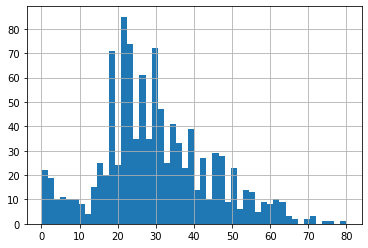

In [74]:
df['age'].hist(bins=50)

## Advantages

Easy to implement
Captures the importance of missingess if there is one

## Disadvantages

- Distorts the original distribution of the variable          
- If missingess is not important, it may mask the predictive power of the original variable by distorting its distribution   
- Hard to decide which value to use                       

#### How To Handle Categroical Missing Values
#### Frequent Category Imputation

In [22]:
df = pd.read_csv('loan.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [41]:
df.isnull().mean().sort_values(ascending=True)

BsmtQual       0.0
FireplaceQu    0.0
GarageType     0.0
SalePrice      0.0
dtype: float64

### compute the frequency with every feature

<AxesSubplot:>

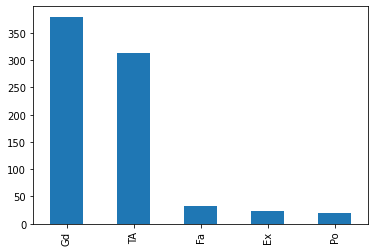

In [31]:
df['FireplaceQu'].value_counts().plot.bar()

<AxesSubplot:xlabel='BsmtQual'>

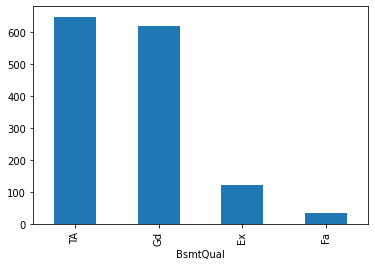

In [25]:
df.groupby(['BsmtQual'])['BsmtQual'].count().sort_values(ascending=False).plot.bar()

<AxesSubplot:>

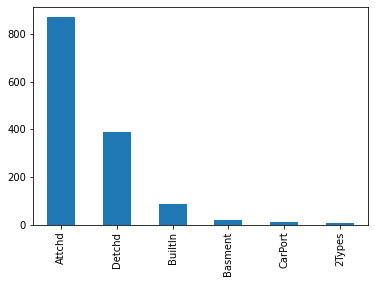

In [29]:
df['GarageType'].value_counts().plot.bar()

<AxesSubplot:>

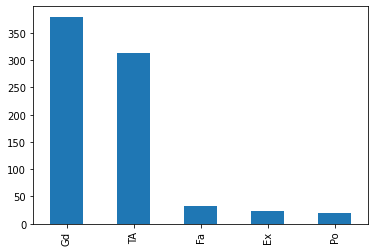

In [30]:
df['FireplaceQu'].value_counts().plot.bar()

In [34]:
df['GarageType'].value_counts().index #[0]

Index(['Attchd', 'Detchd', 'BuiltIn', 'Basment', 'CarPort', '2Types'], dtype='object')

In [35]:
## replacing function
def impute_nan(df,variable):
    most_frequent_category=df[variable].value_counts().index[0]
    df[variable].fillna(most_frequent_category,inplace=True)

In [38]:
for features in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,features)

In [40]:
df.isnull().mean()

BsmtQual       0.0
FireplaceQu    0.0
GarageType     0.0
SalePrice      0.0
dtype: float64

### Advantages
1. Easy to implement
2. faster way to implement

### Disadvantage
1. since we are using the more frequent labels, it may use them in an over represented way, if there are many NAN
2. it distorts the relation of the most frequent label

## Adding a variable to capture in NAN
# Another efficient way to handle nan

In [80]:
df = pd.read_csv('loan.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [81]:
import numpy as np
df['BsmtQual_var'] = np.where(df['BsmtQual'].isnull(),1,0)

In [82]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [88]:
frequent = df['BsmtQual'].mode()[0]

In [89]:
df['BsmtQual'].fillna(frequent,inplace=True)

In [90]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [92]:
df['FireplaceQu_var'] = np.where(df['FireplaceQu'].isnull(),1,0)
frequent = df['BsmtQual'].mode()[0]
df['FireplaceQu'].fillna(frequent,inplace=True)

In [93]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var,FireplaceQu_var
0,Gd,TA,Attchd,208500,0,1
1,Gd,TA,Attchd,181500,0,0
2,Gd,TA,Attchd,223500,0,0
3,TA,Gd,Detchd,140000,0,0
4,Gd,TA,Attchd,250000,0,0


#### suppose if you have more frequent categories we just replace NAN with a new category

In [109]:
df = pd.read_csv('loan.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [110]:
def impute_nan(df, variable):
    df[variable+"newvar"]=np.where(df[variable].isnull(),"Missing",df[variable])

In [111]:
for features in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,features)

In [112]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQualnewvar,FireplaceQunewvar,GarageTypenewvar
0,Gd,NaN,Attchd,208500,Gd,Missing,Attchd
1,Gd,TA,Attchd,181500,Gd,TA,Attchd
2,Gd,TA,Attchd,223500,Gd,TA,Attchd
3,TA,Gd,Detchd,140000,TA,Gd,Detchd
4,Gd,TA,Attchd,250000,Gd,TA,Attchd


In [113]:
df = df.drop(['BsmtQual','FireplaceQu','GarageType'],axis=1)

In [119]:
df.head()

,SalePrice,BsmtQualnewvar,FireplaceQunewvar,GarageTypenewvar
0,208500,Gd,Missing,Attchd
1,181500,Gd,TA,Attchd
2,223500,Gd,TA,Attchd
3,140000,TA,Gd,Detchd
4,250000,Gd,TA,Attchd
